In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [3]:
# generate a list of column names
new_columns = list(range(-80, 19))

In [4]:
data= pd.read_csv(r"D:\ten organism\train data\ganji bac vs. shuffled ten.csv")
downstream= pd.read_csv(r"D:\downstream control\train organism\train_downstream_ganji.csv")

In [5]:
data.isnull().values.any()

False

In [6]:
data.head(5)

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.46,-1.44,-2.81,-1.44,-2.81,-1.95,-1.95,-2.18,-1.76,-1.46,...,-2.18,-1.76,-1.42,-2.81,-1.95,-1.52,-1.46,-1.76,-2.18,1
1,-1.46,-2.18,-1.76,-1.44,-1.95,-1.95,-2.17,-2.18,-1.44,-1.95,...,-1.46,-2.18,-1.95,-2.81,-1.44,-2.81,-1.44,-1.95,-2.17,1
2,-1.52,-2.17,-1.95,-1.44,-2.81,-1.44,-2.18,-1.95,-1.95,-1.46,...,-1.42,-1.76,-2.18,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,1
3,-1.46,-2.99,-1.42,-1.76,-2.18,-1.95,-2.17,-1.95,-1.95,-1.52,...,-2.18,-1.44,-2.17,-1.44,-1.76,-2.18,-1.46,-2.99,-1.76,1
4,-1.52,-1.95,-2.17,-1.95,-2.18,-1.46,-1.95,-1.52,-2.81,-1.44,...,-1.42,-2.18,-1.95,-1.46,-2.18,-1.95,-1.95,-1.95,-1.95,1


In [7]:
downstream.head(5)

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-1.46,-2.81,-1.52,-2.17,-2.18,-1.44,-2.17,-1.95,-1.95,-1.52,...,-1.46,-2.99,-1.76,-1.42,-1.76,-1.76,-2.18,-1.95,-1.46,-2.81
1,-1.76,-2.18,-1.46,-2.18,-1.95,-1.46,-1.76,-2.18,-1.95,-2.81,...,-1.44,-2.99,-1.76,-1.42,-2.99,-1.44,-2.17,-1.52,-2.81,-1.42
2,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,-2.81,-1.44,-1.95,-2.81,...,-1.95,-1.95,-2.81,-1.44,-1.46,-2.99,-1.46,-1.95,-1.44,-2.18
3,-2.81,-1.44,-2.18,-1.95,-2.17,-1.95,-1.95,-1.44,-2.81,-1.95,...,-1.42,-2.99,-1.46,-1.44,-2.99,-1.46,-1.95,-1.95,-1.52,-1.95
4,-1.95,-1.95,-1.46,-2.18,-2.81,-1.42,-2.99,-1.46,-2.18,-1.46,...,-1.46,-2.18,-1.46,-1.44,-2.18,-2.17,-1.44,-2.18,-2.17,-1.52


### Preprocessing Promoter data

In [8]:
promoter_seq = data[data['label'] == 1]
promoter_seq.shape

(14669, 100)

In [9]:
promoter_no_label=promoter_seq.drop(columns=['label'])
promoter_no_label.columns=new_columns
promoter_no_label.shape

(14669, 99)

In [10]:
promoter_without_label=promoter_no_label
promoter_without_label.shape

(14669, 99)

In [11]:
promoter_without_label['label']=1

In [12]:
promoter= promoter_without_label
promoter['label']=promoter['label'].astype(int)
promoter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14669 entries, 0 to 14668
Data columns (total 100 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   -80     14669 non-null  float64
 1   -79     14669 non-null  float64
 2   -78     14669 non-null  float64
 3   -77     14669 non-null  float64
 4   -76     14669 non-null  float64
 5   -75     14669 non-null  float64
 6   -74     14669 non-null  float64
 7   -73     14669 non-null  float64
 8   -72     14669 non-null  float64
 9   -71     14669 non-null  float64
 10  -70     14669 non-null  float64
 11  -69     14669 non-null  float64
 12  -68     14669 non-null  float64
 13  -67     14669 non-null  float64
 14  -66     14669 non-null  float64
 15  -65     14669 non-null  float64
 16  -64     14669 non-null  float64
 17  -63     14669 non-null  float64
 18  -62     14669 non-null  float64
 19  -61     14669 non-null  float64
 20  -60     14669 non-null  float64
 21  -59     14669 non-null  float64
 2

### Preprocessing Downstream Data

In [13]:
downstream

,150,151,152,153,154,155,156,157,158,159,...,239,240,241,242,243,244,245,246,247,248
0,-1.46,-2.81,-1.52,-2.17,-2.18,-1.44,-2.17,-1.95,-1.95,-1.52,...,-1.46,-2.99,-1.76,-1.42,-1.76,-1.76,-2.18,-1.95,-1.46,-2.81
1,-1.76,-2.18,-1.46,-2.18,-1.95,-1.46,-1.76,-2.18,-1.95,-2.81,...,-1.44,-2.99,-1.76,-1.42,-2.99,-1.44,-2.17,-1.52,-2.81,-1.42
2,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,-2.81,-1.44,-1.95,-2.81,...,-1.95,-1.95,-2.81,-1.44,-1.46,-2.99,-1.46,-1.95,-1.44,-2.18
3,-2.81,-1.44,-2.18,-1.95,-2.17,-1.95,-1.95,-1.44,-2.81,-1.95,...,-1.42,-2.99,-1.46,-1.44,-2.99,-1.46,-1.95,-1.95,-1.52,-1.95
4,-1.95,-1.95,-1.46,-2.18,-2.81,-1.42,-2.99,-1.46,-2.18,-1.46,...,-1.46,-2.18,-1.46,-1.44,-2.18,-2.17,-1.44,-2.18,-2.17,-1.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-2.17,-1.95,-1.44,-2.99,-1.46,-1.44,-1.76,-2.81,-1.95,-1.44,...,-1.46,-2.18,-1.46,-2.81,-1.95,-1.44,-2.99,-1.76,-1.76,-1.44
14665,-2.18,-1.95,-1.46,-2.81,-2.18,-1.44,-2.81,-1.76,-1.44,-1.46,...,-2.17,-1.95,-1.52,-2.81,-1.46,-2.18,-1.76,-1.46,-1.52,-2.81
14666,-1.95,-1.95,-1.95,-1.95,-1.44,-1.76,-2.99,-1.42,-2.81,-1.52,...,-1.95,-1.52,-1.46,-2.18,-2.81,-1.44,-1.46,-2.81,-1.95,-1.44
14667,-1.42,-2.18,-1.95,-2.17,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,...,-1.52,-2.17,-1.95,-1.95,-1.95,-1.95,-1.52,-2.81,-1.44,-2.81


In [14]:
downstream.columns= new_columns
downstream_no_label=downstream
downstream['label']= 0
downstream['label']= downstream['label'].astype(int)

In [15]:
downstream

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.46,-2.81,-1.52,-2.17,-2.18,-1.44,-2.17,-1.95,-1.95,-1.52,...,-2.99,-1.76,-1.42,-1.76,-1.76,-2.18,-1.95,-1.46,-2.81,0
1,-1.76,-2.18,-1.46,-2.18,-1.95,-1.46,-1.76,-2.18,-1.95,-2.81,...,-2.99,-1.76,-1.42,-2.99,-1.44,-2.17,-1.52,-2.81,-1.42,0
2,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,-2.81,-1.44,-1.95,-2.81,...,-1.95,-2.81,-1.44,-1.46,-2.99,-1.46,-1.95,-1.44,-2.18,0
3,-2.81,-1.44,-2.18,-1.95,-2.17,-1.95,-1.95,-1.44,-2.81,-1.95,...,-2.99,-1.46,-1.44,-2.99,-1.46,-1.95,-1.95,-1.52,-1.95,0
4,-1.95,-1.95,-1.46,-2.18,-2.81,-1.42,-2.99,-1.46,-2.18,-1.46,...,-2.18,-1.46,-1.44,-2.18,-2.17,-1.44,-2.18,-2.17,-1.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-2.17,-1.95,-1.44,-2.99,-1.46,-1.44,-1.76,-2.81,-1.95,-1.44,...,-2.18,-1.46,-2.81,-1.95,-1.44,-2.99,-1.76,-1.76,-1.44,0
14665,-2.18,-1.95,-1.46,-2.81,-2.18,-1.44,-2.81,-1.76,-1.44,-1.46,...,-1.95,-1.52,-2.81,-1.46,-2.18,-1.76,-1.46,-1.52,-2.81,0
14666,-1.95,-1.95,-1.95,-1.95,-1.44,-1.76,-2.99,-1.42,-2.81,-1.52,...,-1.52,-1.46,-2.18,-2.81,-1.44,-1.46,-2.81,-1.95,-1.44,0
14667,-1.42,-2.18,-1.95,-2.17,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,...,-2.17,-1.95,-1.95,-1.95,-1.95,-1.52,-2.81,-1.44,-2.81,0


### Plotting Graph

In [16]:
for_line= pd.DataFrame(promoter_no_label.mean())
downstream_line= pd.DataFrame(downstream_no_label.mean())

In [17]:
for_line.reset_index(drop=False, inplace=True)
for_line.drop(for_line.index[-1], inplace=True)
for_line['index']=for_line['index'].astype(int)

downstream_line.reset_index(drop=False, inplace=True)
downstream_line.drop(downstream_line.index[-1], inplace=True)

for_line

,index,0
0,-80,-1.954591
1,-79,-1.960165
2,-78,-1.966735
3,-77,-1.954670
4,-76,-1.958529
...,...,...
94,14,-1.950377
95,15,-1.944175
96,16,-1.963481
97,17,-1.951034


In [18]:
downstream_columns= list(range(150,249))
downstream_line['downstream position']= downstream_columns
downstream_line['index']=downstream_line['index'].astype(int)
downstream_line

,index,0,downstream position
0,-80,-1.961008,150
1,-79,-1.967088,151
2,-78,-1.964322,152
3,-77,-1.961254,153
4,-76,-1.970356,154
...,...,...,...
94,14,-1.980517,244
95,15,-1.960736,245
96,16,-1.958850,246
97,17,-1.979881,247


In [19]:
downstream_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                99 non-null     int32  
 1   0                    99 non-null     float64
 2   downstream position  99 non-null     int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [20]:
for_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   99 non-null     int32  
 1   0       99 non-null     float64
dtypes: float64(1), int32(1)
memory usage: 1.3 KB


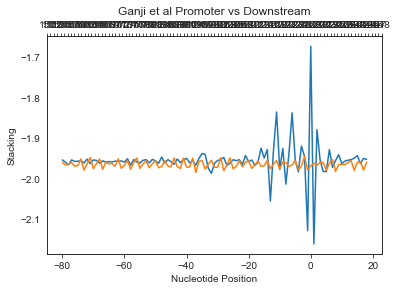

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('white')
# create the Seaborn line plots
plot = sns.lineplot(x='index', y=0, data=for_line)
plot = sns.lineplot(x='index', y=0, data=downstream_line)

# create a twin Axes object for the new x-axis
ax2 = plot.twiny()

# set the new x-axis tick positions and labels
ax2.set_xticks(downstream_line.index)
ax2.set_xticklabels(downstream_line['downstream position'])

# set the x-axis and y-axis labels and title
plot.set(xlabel="Nucleotide Position", ylabel="Stacking", title='Ganji et al Promoter vs Downstream')

# show the plot
plt.show()


### Preparing Training Data

In [22]:
data= pd.concat([promoter,downstream])

In [23]:
data.reset_index(drop=True, inplace=True)

In [24]:
data

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.46,-1.44,-2.81,-1.44,-2.81,-1.95,-1.95,-2.18,-1.76,-1.46,...,-2.18,-1.76,-1.42,-2.81,-1.95,-1.52,-1.46,-1.76,-2.18,1
1,-1.46,-2.18,-1.76,-1.44,-1.95,-1.95,-2.17,-2.18,-1.44,-1.95,...,-1.46,-2.18,-1.95,-2.81,-1.44,-2.81,-1.44,-1.95,-2.17,1
2,-1.52,-2.17,-1.95,-1.44,-2.81,-1.44,-2.18,-1.95,-1.95,-1.46,...,-1.42,-1.76,-2.18,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,1
3,-1.46,-2.99,-1.42,-1.76,-2.18,-1.95,-2.17,-1.95,-1.95,-1.52,...,-2.18,-1.44,-2.17,-1.44,-1.76,-2.18,-1.46,-2.99,-1.76,1
4,-1.52,-1.95,-2.17,-1.95,-2.18,-1.46,-1.95,-1.52,-2.81,-1.44,...,-1.42,-2.18,-1.95,-1.46,-2.18,-1.95,-1.95,-1.95,-1.95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29333,-2.17,-1.95,-1.44,-2.99,-1.46,-1.44,-1.76,-2.81,-1.95,-1.44,...,-2.18,-1.46,-2.81,-1.95,-1.44,-2.99,-1.76,-1.76,-1.44,0
29334,-2.18,-1.95,-1.46,-2.81,-2.18,-1.44,-2.81,-1.76,-1.44,-1.46,...,-1.95,-1.52,-2.81,-1.46,-2.18,-1.76,-1.46,-1.52,-2.81,0
29335,-1.95,-1.95,-1.95,-1.95,-1.44,-1.76,-2.99,-1.42,-2.81,-1.52,...,-1.52,-1.46,-2.18,-2.81,-1.44,-1.46,-2.81,-1.95,-1.44,0
29336,-1.42,-2.18,-1.95,-2.17,-1.44,-1.76,-2.18,-1.95,-1.46,-2.18,...,-2.17,-1.95,-1.95,-1.95,-1.95,-1.52,-2.81,-1.44,-2.81,0


# Prediction using machine learning

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix


In [26]:

X = data.drop('label', axis=1)
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=101)

inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)





In [27]:
feature_list=list(X_train.columns)

In [28]:
X.shape

(29338, 99)

## Model Training

In [29]:
kfold = KFold(n_splits=10, shuffle=True)
clf = XGBClassifier(colsample_bytree=0.5, gamma=0, learning_rate=0.1, 
                    max_depth=None, min_child_weight=5, n_estimators=300, 
                    subsample=1.0, n_jobs=-1, random_state=101)
fold_no = 1
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []
mcc_list = []
specificity_list = []

for train, test in kfold.split(inputs, targets):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

    inputs = np.concatenate((X_train, X_test), axis=0)
    targets = np.concatenate((y_train, y_test), axis=0)

    trainX, testX = inputs[train], inputs[test]
    trainY, testY = targets[train], targets[test]
    clf.fit(trainX, trainY)
    y_pred = clf.predict(testX)

    accuracy_list.append(accuracy_score(testY, y_pred))
    precision_list.append(precision_score(testY, y_pred))
    recall_list.append(recall_score(testY, y_pred))
    f1_score_list.append(f1_score(testY, y_pred))
    
    # Calculate MCC
    mcc = matthews_corrcoef(testY, y_pred)
    mcc_list.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = confusion_matrix(testY, y_pred).ravel()
    specificity = tn / (tn + fp)
    specificity_list.append(specificity)

    print("Fold {}: Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        fold_no, accuracy_list[-1], precision_list[-1], recall_list[-1], f1_score_list[-1], mcc_list[-1], specificity_list[-1]))
    
    fold_no += 1

Fold 1: Accuracy: 0.8735514655760055, Precision: 0.8904208998548622, Recall: 0.8479612992398065, F1 Score: 0.8686725663716813, MCC: 0.7477224970010591, Specificity: 0.898453261600538
Fold 2: Accuracy: 0.8687798227675528, Precision: 0.8870621872766261, Recall: 0.8453678474114441, F1 Score: 0.8657132891524242, MCC: 0.7383850914676922, Specificity: 0.8922237380627558
Fold 3: Accuracy: 0.8680981595092024, Precision: 0.8949640287769784, Recall: 0.8377104377104377, F1 Score: 0.8653913043478262, MCC: 0.7379129921806528, Specificity: 0.8992408557625949
Fold 4: Accuracy: 0.8834355828220859, Precision: 0.8945260347129506, Recall: 0.8792650918635171, F1 Score: 0.886829913964262, MCC: 0.7668002335751951, Specificity: 0.8879432624113475
Fold 5: Accuracy: 0.8595773687798227, Precision: 0.8618556701030928, Recall: 0.8559726962457338, F1 Score: 0.8589041095890411, MCC: 0.7191683147277087, Specificity: 0.8631722260040844
Fold 6: Accuracy: 0.8715064758009543, Precision: 0.8806497175141242, Recall: 0.857

In [30]:
accuracy_list

[0.8735514655760055,
 0.8687798227675528,
 0.8680981595092024,
 0.8834355828220859,
 0.8595773687798227,
 0.8715064758009543,
 0.8657123381049762,
 0.8626448534423995,
 0.8755540402318446,
 0.8854415274463007]

In [31]:
precision_list

[0.8904208998548622,
 0.8870621872766261,
 0.8949640287769784,
 0.8945260347129506,
 0.8618556701030928,
 0.8806497175141242,
 0.875270367700072,
 0.8838845883180858,
 0.8979591836734694,
 0.9052167523879501]

In [32]:
recall_list

[0.8479612992398065,
 0.8453678474114441,
 0.8377104377104377,
 0.8792650918635171,
 0.8559726962457338,
 0.8570446735395189,
 0.845993031358885,
 0.8406961178045516,
 0.8455730954015099,
 0.8561501042390549]

In [33]:
specificity_list

[0.898453261600538,
 0.8922237380627558,
 0.8992408557625949,
 0.8879432624113475,
 0.8631722260040844,
 0.8857336037863421,
 0.8845897264843229,
 0.8854166666666666,
 0.9051490514905149,
 0.9136546184738956]

In [34]:
f1_score_list 

[0.8686725663716813,
 0.8657132891524242,
 0.8653913043478262,
 0.886829913964262,
 0.8589041095890411,
 0.8686868686868686,
 0.8603827072997874,
 0.8617495711835335,
 0.8709791445740546,
 0.88]

In [35]:
mcc_list

[0.7477224970010591,
 0.7383850914676922,
 0.7379129921806528,
 0.7668002335751951,
 0.7191683147277087,
 0.7432026772297018,
 0.7314974187832687,
 0.7263469632388749,
 0.7522698834077749,
 0.7716687860021528]

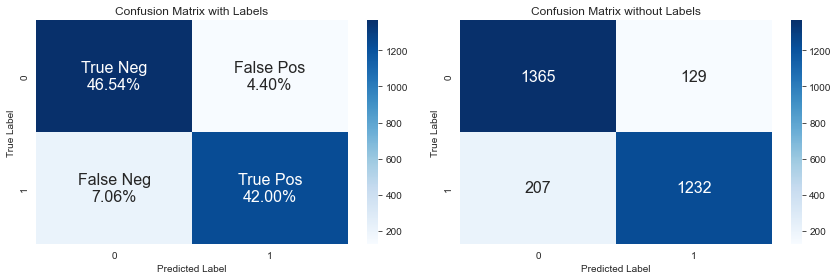

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

train_cm = confusion_matrix(testY, y_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
train_cm_array = train_cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in train_cm_array / np.sum(train_cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
sns.heatmap(train_cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
sns.heatmap(train_cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


In [47]:
import pickle

# Save the trained model to a file in pickle format
model_filename = 'MGD_model.pickle'
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)

print("Model saved successfully.")


Model saved successfully.


In [37]:
print(mean(accuracy_list))

0.8714301634481144


C:\Users\Subhojit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


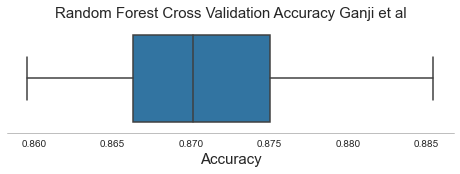

In [38]:
# Create a new figure with a larger size
plt.figure(figsize=(8,2))

# Create the boxplot with a custom title and color
ax = sns.boxplot(np.array(accuracy_list))
#sns.set(style='white')
#sns.set_palette('default')
plt.title('Random Forest Cross Validation Accuracy Ganji et al', fontsize=15)  # Set font size of title
plt.xlabel('Accuracy', fontsize=15)  # Set font size of x-label

# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Remove left and bottom ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

# Remove left and bottom spines and set their color to gray
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')
ax.spines['left'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(0.5)

# Display the plot
plt.show()


## Feature Importance

In [39]:
clf.feature_importances_

array([0.00552398, 0.00560404, 0.00634718, 0.0062203 , 0.0055158 ,
       0.00535584, 0.00568062, 0.00643561, 0.00579384, 0.00605473,
       0.00527304, 0.00527253, 0.00561307, 0.00605832, 0.00601719,
       0.00597693, 0.00607182, 0.00684526, 0.00589934, 0.00548376,
       0.00669345, 0.0061205 , 0.0054027 , 0.00592768, 0.00598258,
       0.0056859 , 0.00564433, 0.00633326, 0.00677999, 0.00579911,
       0.00628458, 0.00624789, 0.00593134, 0.0058124 , 0.0058709 ,
       0.00601701, 0.00564831, 0.00589072, 0.00697829, 0.00579074,
       0.00666632, 0.00595905, 0.00619066, 0.00559683, 0.0056716 ,
       0.00763285, 0.00727321, 0.00712119, 0.00697187, 0.00567876,
       0.00627445, 0.00641792, 0.005803  , 0.00642106, 0.00646775,
       0.00712367, 0.00734131, 0.00633998, 0.00713072, 0.00647763,
       0.00679393, 0.00737065, 0.00775475, 0.00738239, 0.00706641,
       0.00822235, 0.00940094, 0.01510884, 0.04747734, 0.10810667,
       0.02666188, 0.01428933, 0.02399481, 0.0343199 , 0.01859

In [40]:
clf.feature_importances_.shape

(99,)

In [41]:
X_train.columns

Index([-80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -67,
       -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53,
       -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39,
       -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11,
       -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,   3,
         4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,
        18],
      dtype='object')

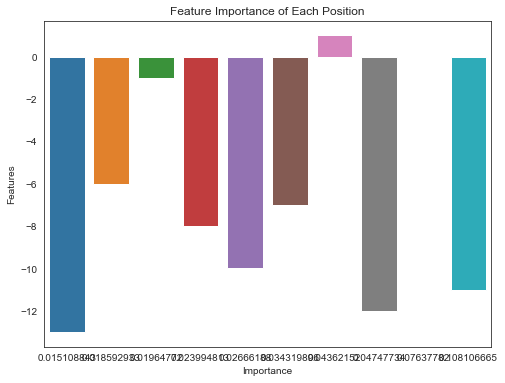

In [42]:
imp_df= pd.DataFrame({
    "Features": X_train.columns,
    "Importance": clf.feature_importances_
})

fi= imp_df.sort_values(by="Importance",ascending=False)

fi2=fi.head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=fi2, x="Importance", y="Features")
plt.title('Feature Importance of Each Position')
plt.show()

In [43]:
feature_importance= pd.DataFrame(clf.feature_importances_)
feature_importance.reset_index(drop=False, inplace=True)
feature_importance['indice']= new_columns
feature_importance

,index,0,indice
0,0,0.005524,-80
1,1,0.005604,-79
2,2,0.006347,-78
3,3,0.006220,-77
4,4,0.005516,-76
...,...,...,...
94,94,0.006066,14
95,95,0.006277,15
96,96,0.005274,16
97,97,0.006636,17


[Text(0.5, 0, 'features'),
 Text(0, 0.5, 'importance'),
 Text(0.5, 1.0, 'feature importance')]

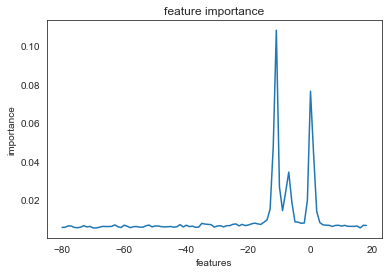

In [44]:
plot= sns.lineplot(x='indice', y=0, data=feature_importance)
plot.set(xlabel ="features", ylabel = "importance", title ='feature importance')

In [45]:
print("Accuracy:",metrics.accuracy_score(testY, y_pred))
print("Precision:",metrics.precision_score(testY, y_pred))
print("Recall:",metrics.recall_score(testY, y_pred))
print("f1_score:",metrics.f1_score(testY, y_pred))

Accuracy: 0.8854415274463007
Precision: 0.9052167523879501
Recall: 0.8561501042390549
f1_score: 0.88


C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


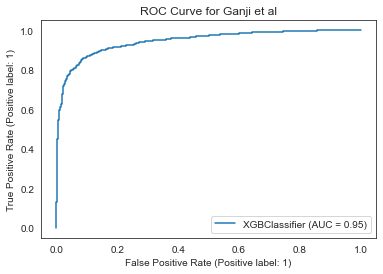

In [46]:
roc_curve= metrics.plot_roc_curve(clf, testX, testY)
roc_curve.ax_.set_title("ROC Curve for Ganji et al")
plt.show()

C:\Users\Subhojit\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


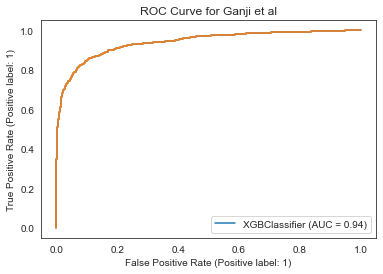

In [48]:
import pandas as pd

# Assuming roc_curve is the object returned by metrics.plot_roc_curve
roc_curve = metrics.plot_roc_curve(clf, testX, testY)

# Extract the data points from roc_curve
fpr = roc_curve.fpr
tpr = roc_curve.tpr

# Create a DataFrame
roc_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr})

roc_df.to_csv('d:/ROC Curve data/downstream_ganji_xg_roc_df.csv', index=False)

# Plot the ROC curve from the DataFrame
plt.plot(roc_df['False Positive Rate'], roc_df['True Positive Rate'])
plt.title("ROC Curve for Ganji et al")
plt.show()


# Using Shapley

In [45]:
!pip install shap

In [46]:
import shap


In [47]:
promoter.shape

(14669, 100)

In [48]:
promoter

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.46,-1.44,-2.81,-1.44,-2.81,-1.95,-1.95,-2.18,-1.76,-1.46,...,-2.18,-1.76,-1.42,-2.81,-1.95,-1.52,-1.46,-1.76,-2.18,1
1,-1.46,-2.18,-1.76,-1.44,-1.95,-1.95,-2.17,-2.18,-1.44,-1.95,...,-1.46,-2.18,-1.95,-2.81,-1.44,-2.81,-1.44,-1.95,-2.17,1
2,-1.52,-2.17,-1.95,-1.44,-2.81,-1.44,-2.18,-1.95,-1.95,-1.46,...,-1.42,-1.76,-2.18,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44,1
3,-1.46,-2.99,-1.42,-1.76,-2.18,-1.95,-2.17,-1.95,-1.95,-1.52,...,-2.18,-1.44,-2.17,-1.44,-1.76,-2.18,-1.46,-2.99,-1.76,1
4,-1.52,-1.95,-2.17,-1.95,-2.18,-1.46,-1.95,-1.52,-2.81,-1.44,...,-1.42,-2.18,-1.95,-1.46,-2.18,-1.95,-1.95,-1.95,-1.95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-1.44,-1.76,-1.76,-2.18,-2.17,-1.95,-1.95,-1.95,-1.44,-2.99,...,-2.99,-1.44,-2.17,-1.95,-1.95,-1.44,-2.81,-2.18,-1.44,1
14665,-1.46,-1.76,-2.81,-2.18,-1.44,-1.95,-1.95,-1.95,-2.81,-1.44,...,-1.46,-1.52,-2.17,-1.44,-2.99,-1.46,-1.95,-1.52,-1.46,1
14666,-1.76,-2.18,-2.17,-1.52,-1.95,-1.95,-1.95,-1.95,-1.95,-1.95,...,-1.95,-1.95,-1.52,-2.17,-1.44,-1.76,-2.99,-1.44,-1.95,1
14667,-2.99,-1.44,-1.46,-2.18,-1.46,-2.81,-1.95,-2.18,-1.44,-2.81,...,-1.95,-2.17,-1.52,-1.95,-2.17,-1.52,-1.95,-2.17,-1.95,1


### X Promotor

In [49]:
X_promoters= promoter.drop(columns=['label']) #X.loc[:14668]
X_promoters

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
0,-1.46,-1.44,-2.81,-1.44,-2.81,-1.95,-1.95,-2.18,-1.76,-1.46,...,-2.17,-2.18,-1.76,-1.42,-2.81,-1.95,-1.52,-1.46,-1.76,-2.18
1,-1.46,-2.18,-1.76,-1.44,-1.95,-1.95,-2.17,-2.18,-1.44,-1.95,...,-2.18,-1.46,-2.18,-1.95,-2.81,-1.44,-2.81,-1.44,-1.95,-2.17
2,-1.52,-2.17,-1.95,-1.44,-2.81,-1.44,-2.18,-1.95,-1.95,-1.46,...,-2.81,-1.42,-1.76,-2.18,-2.17,-1.44,-2.81,-1.95,-1.95,-1.44
3,-1.46,-2.99,-1.42,-1.76,-2.18,-1.95,-2.17,-1.95,-1.95,-1.52,...,-1.95,-2.18,-1.44,-2.17,-1.44,-1.76,-2.18,-1.46,-2.99,-1.76
4,-1.52,-1.95,-2.17,-1.95,-2.18,-1.46,-1.95,-1.52,-2.81,-1.44,...,-2.81,-1.42,-2.18,-1.95,-1.46,-2.18,-1.95,-1.95,-1.95,-1.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-1.44,-1.76,-1.76,-2.18,-2.17,-1.95,-1.95,-1.95,-1.44,-2.99,...,-1.44,-2.99,-1.44,-2.17,-1.95,-1.95,-1.44,-2.81,-2.18,-1.44
14665,-1.46,-1.76,-2.81,-2.18,-1.44,-1.95,-1.95,-1.95,-2.81,-1.44,...,-2.99,-1.46,-1.52,-2.17,-1.44,-2.99,-1.46,-1.95,-1.52,-1.46
14666,-1.76,-2.18,-2.17,-1.52,-1.95,-1.95,-1.95,-1.95,-1.95,-1.95,...,-1.95,-1.95,-1.95,-1.52,-2.17,-1.44,-1.76,-2.99,-1.44,-1.95
14667,-2.99,-1.44,-1.46,-2.18,-1.46,-2.81,-1.95,-2.18,-1.44,-2.81,...,-1.44,-1.95,-2.17,-1.52,-1.95,-2.17,-1.52,-1.95,-2.17,-1.95


In [53]:
explainer = shap.TreeExplainer(clf, X_promoters)
shap_values = explainer.shap_values(X_promoters)

 99%|===================| 14586/14669 [02:44<00:00]        

In [54]:
shap_file = pd.DataFrame(shap_values)
shap_train_csv_file = 'shap_train.csv'

with open(shap_train_csv_file, mode='w') as f:
    shap_file.to_csv(f)

In [73]:
shap_file.columns= new_columns
shap_file

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,9,10,11,12,13,14,15,16,17,18
0,-0.002657,-0.027841,0.013655,0.023193,-0.007425,-0.009935,-0.016422,-0.013688,-0.000190,-0.030331,...,-0.004316,0.005280,0.026763,-0.043996,0.018254,0.033880,-0.015797,0.012034,0.007984,0.082005
1,-0.015847,0.029916,0.013227,-0.014241,0.021386,-0.017990,0.007907,-0.045813,0.031950,-0.001813,...,0.031146,-0.000895,0.014014,0.014290,0.011677,-0.018832,0.015665,0.038319,0.005850,0.026747
2,0.001295,-0.039094,0.009703,-0.052145,-0.021143,-0.004102,-0.008304,0.004946,0.029444,-0.058830,...,-0.078243,0.012073,0.004456,0.048117,0.040598,-0.000629,0.028920,-0.000515,0.008035,-0.110393
3,-0.015428,-0.005461,0.074266,0.027143,-0.019249,-0.020152,-0.004112,-0.010395,0.002160,-0.027867,...,0.051684,0.021779,-0.011254,0.066538,0.036923,0.043061,0.036277,-0.004407,-0.039031,0.025722
4,-0.020130,0.006618,-0.006634,-0.004171,-0.022282,-0.006722,-0.006937,0.008109,0.013479,-0.094735,...,-0.051894,0.050337,0.024467,-0.004988,-0.021417,-0.036860,0.004593,0.007640,-0.000688,0.000083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14664,-0.023113,0.026307,0.027428,-0.038122,-0.022805,-0.009252,0.005540,-0.003560,-0.086470,0.003205,...,0.012275,-0.047760,-0.037379,0.075056,0.015368,0.007016,-0.010726,0.033550,-0.003786,-0.068531
14665,-0.014615,0.070776,0.028253,-0.048084,0.002595,-0.003813,0.007782,-0.006015,0.030221,-0.047567,...,-0.122278,0.005451,0.059460,0.054520,0.030796,-0.048741,-0.061161,0.013324,0.026489,-0.119545
14666,-0.020405,-0.001356,-0.008023,0.003940,0.002203,-0.021882,-0.018543,-0.008797,0.001297,-0.004824,...,0.018178,0.040466,0.036060,-0.072031,0.013415,-0.065990,0.027362,-0.059505,-0.009217,0.000015
14667,0.026907,0.002984,-0.052181,-0.019176,0.001093,-0.021298,-0.005630,-0.018952,-0.016906,0.051196,...,0.053928,-0.008862,0.014202,-0.055189,0.022977,0.005128,0.007566,0.016567,-0.002150,0.002013


In [75]:
print('Average for -11 Shap Value', shap_file[-11].mean())
print('Min for -11 Shap Value', shap_file[-11].min())
print('Max for -11 Shap Value', shap_file[-11].max())


Average for -11 Shap Value -0.07325559756682565
Min for -11 Shap Value -2.319311161643418
Max for -11 Shap Value 1.7567282408359461


In [76]:
shap_line= pd.DataFrame(shap_file.mean())
shap_line.reset_index(drop=False, inplace=True)

shap_line.sort_values(by=[0])

,index,0
68,-12,-0.205328
69,-11,-0.073256
72,-8,-0.022499
71,-9,-0.021535
85,5,-0.015069
...,...,...
58,-22,0.012027
66,-14,0.016347
70,-10,0.065053
73,-7,0.065492


[Text(0.5, 0, 'Nucleotide Position'),
 Text(0, 0.5, 'Shap values'),
 Text(0.5, 1.0, 'Ganji Shapley Values')]

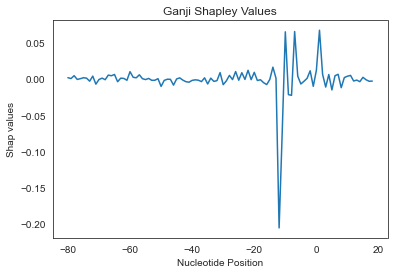

In [77]:
shap_plot=sns.lineplot(x='index',y=0,data=shap_line)
shap_plot.set(xlabel ="Nucleotide Position", ylabel = "Shap values", title ='Ganji Shapley Values')

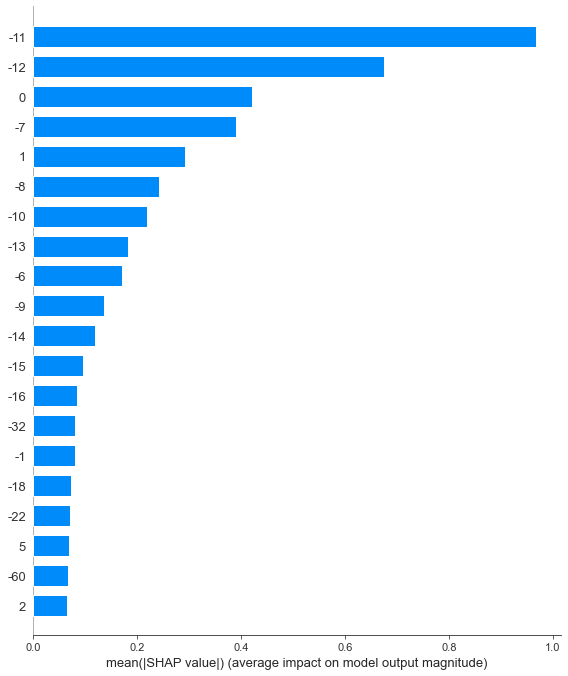

In [55]:
shap.summary_plot(shap_values,X_promoters, plot_type="bar", feature_names = X_promoters.columns)

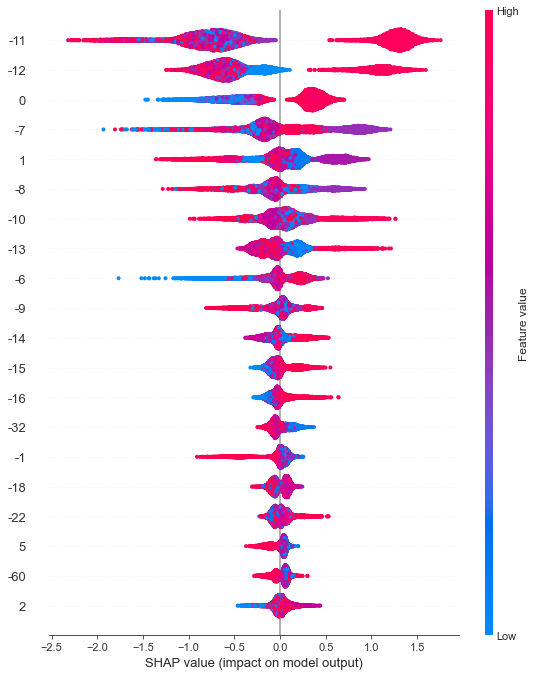

In [56]:
shap.summary_plot(shap_values, X_promoters, feature_names = X_promoters.columns)

AttributeError: 'int' object has no attribute 'split'

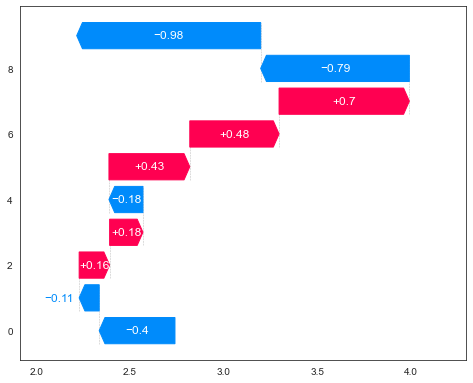

In [57]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[4], feature_names = X_promoters.columns)

In [ ]:
shap.initjs()
#shap.plots.force(explainer.expected_value, shap_values, feature_names = X_promoters.columns)

In [58]:
shap.initjs()
shap.plots.force(explainer.expected_value,shap_values[0], feature_names = X_promoters.columns)

# Test Organism Predictions

## Test Data

In [49]:
# Load the Test organisms dataset into a DataFrame
klebsiella = pd.read_csv(r"D:\ten organism\ganji\test organism\stability_Sequences_80-20_sequences Klebsiella pneumoniae_output.csv")
salmonella= pd.read_csv(r"D:\ten organism\ganji\test organism\stability_Sequences_80-20_sequences Salmonella enterica_output.csv")
klebsiella_downstream= pd.read_csv(r"D:\downstream control\ganji\result\test organism\stability_Klebsiella pneumoniae_output.csv")
salmonella_downstream= pd.read_csv(r"D:\downstream control\ganji\result\test organism\stability_Salmonella enterica_output.csv")

# Remove any irrelevant columns
test_organism = pd.concat([klebsiella,salmonella])
test_organism.columns=new_columns
test_organism.reset_index(drop=True, inplace=True)

test_organism_downstream= pd.concat([klebsiella_downstream,salmonella_downstream])
test_organism_downstream.columns=new_columns
test_organism_downstream.reset_index(drop=True, inplace=True)

test_without_labels= pd.concat([test_organism, test_organism_downstream])


In [50]:
test_line= pd.DataFrame(test_organism.mean())
test_line.reset_index(drop=False, inplace=True)
downstream_test_line=pd.DataFrame(test_organism_downstream.mean())
downstream_test_line.reset_index(drop= False, inplace=True)



[Text(0.5, 0, 'Nucleotide Position'),
 Text(0, 0.5, 'Stacking'),
 Text(0.5, 1.0, 'Ganji Test Organism')]

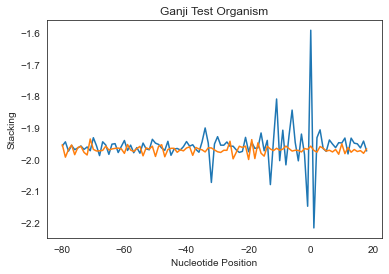

In [51]:
test_plot=sns.lineplot(x='index',y=0,data=test_line)
test_plot=sns.lineplot(x='index',y=0, data= downstream_test_line)

test_plot.set(xlabel ="Nucleotide Position", ylabel = "Stacking", title ='Ganji Test Organism')

## Test Labels

In [52]:
test_organism_lables= np.ones(test_organism.shape[0], dtype=int)
test_downstream_labels= np.zeros(test_organism_downstream.shape[0], dtype=int)

test_labels = np.concatenate((test_organism_lables, test_downstream_labels))

In [53]:
test_without_labels.shape

(4620, 99)

## Test Prediction in One Go

In [54]:
# Create an array of ones with the same number of rows as the new dataset
#true_labels = np.ones(test_organism.shape[0], dtype=int)

# Make predictions on the new data
test_organism_pred = clf.predict(test_without_labels)

# Calculate the accuracy of the model on the new data
accuracy = metrics.accuracy_score(test_labels, test_organism_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9181818181818182


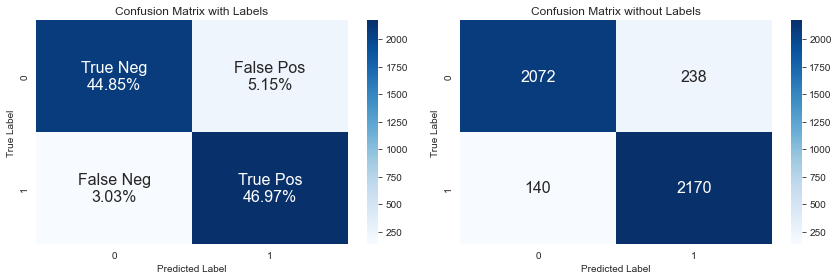

In [55]:
# Compute confusion matrix
cm = confusion_matrix(test_labels, test_organism_pred)

# Define labels for the four quadrants of the confusion matrix
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

# Reshape confusion matrix into a 1D array for plotting
cm_array = cm.ravel()

# Compute percentage values for each quadrant
percentages = ['{0:.2%}'.format(value) for value in cm_array / np.sum(cm_array)]

# Combine labels and percentages into a list of strings for plotting
labels = [f"{v1}\n{v2}" for v1, v2 in zip(labels, percentages)]

# Reshape labels into a 2D array for plotting
labels = np.asarray(labels).reshape(2,2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot with labels
#sns.set(font_scale=1.4, ax=axes[0])
sns.heatmap(cm, annot=labels, annot_kws={"size": 16}, cmap='Blues', fmt='', ax=axes[0])
axes[0].set_title('Confusion Matrix with Labels')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot without labels
#sns.set(font_scale=1.4, ax=axes[1])
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=axes[1])
axes[1].set_title('Confusion Matrix without Labels')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


## Test Prediction in 10 splits

In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score

In [57]:
# Convert DataFrame to numpy array
if isinstance(test_without_labels, pd.DataFrame):
    test_without_labels = test_without_labels.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

test_accuracy = []
test_precision = []
test_recall = []
test_f1_score = []
test_mcc = []
test_specificity = []
all_cms = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(test_without_labels, test_labels)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = test_without_labels[test_index]
    y_test = test_labels[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_accuracy.append(accuracy)
    test_precision.append(precision)
    test_recall.append(recall)
    test_f1_score.append(f1)
    
    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    all_cms.append(cm)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    test_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    test_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
        test_accuracy[-1], test_precision[-1], test_recall[-1], test_f1_score[-1], test_mcc[-1], test_specificity[-1]))

Fold 1/10
 Accuracy: 0.922077922077922, Precision: 0.9045643153526971, Recall: 0.9437229437229437, F1 Score: 0.923728813559322, MCC: 0.8449479434219571, Specificity: 0.9004329004329005
Fold 2/10
 Accuracy: 0.9155844155844156, Precision: 0.875, Recall: 0.9696969696969697, F1 Score: 0.919917864476386, MCC: 0.8360796171499412, Specificity: 0.8614718614718615
Fold 3/10
 Accuracy: 0.8961038961038961, Precision: 0.8796680497925311, Recall: 0.9177489177489178, F1 Score: 0.8983050847457626, MCC: 0.7929511469036828, Specificity: 0.8744588744588745
Fold 4/10
 Accuracy: 0.9090909090909091, Precision: 0.8764940239043825, Recall: 0.9523809523809523, F1 Score: 0.9128630705394192, MCC: 0.8212657582461153, Specificity: 0.8658008658008658
Fold 5/10
 Accuracy: 0.9372294372294372, Precision: 0.9353448275862069, Recall: 0.9393939393939394, F1 Score: 0.937365010799136, MCC: 0.8744670683754555, Specificity: 0.935064935064935
Fold 6/10
 Accuracy: 0.9307359307359307, Precision: 0.927038626609442, Recall: 0.93

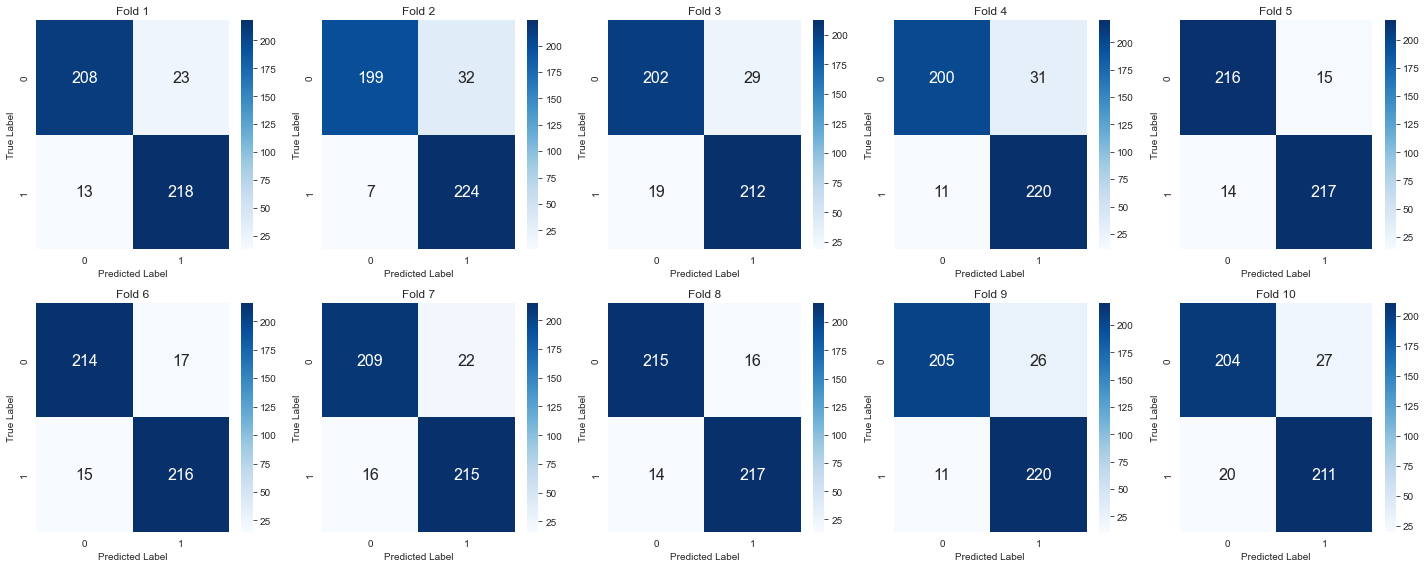

In [58]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axs.flatten()):
    if i < len(all_cms):
        cm = all_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


In [59]:
test_accuracy

[0.922077922077922,
 0.9155844155844156,
 0.8961038961038961,
 0.9090909090909091,
 0.9372294372294372,
 0.9307359307359307,
 0.9177489177489178,
 0.935064935064935,
 0.9199134199134199,
 0.8982683982683982]

In [60]:
test_precision

[0.9045643153526971,
 0.875,
 0.8796680497925311,
 0.8764940239043825,
 0.9353448275862069,
 0.927038626609442,
 0.9071729957805907,
 0.9313304721030042,
 0.8943089430894309,
 0.8865546218487395]

- Precision equal to 1.0 means that all the positive predictions made by the classifier are correct. 
- In other words, the classifier didn't make any false positive predictions. 

In [61]:
test_recall

[0.9437229437229437,
 0.9696969696969697,
 0.9177489177489178,
 0.9523809523809523,
 0.9393939393939394,
 0.935064935064935,
 0.9307359307359307,
 0.9393939393939394,
 0.9523809523809523,
 0.9134199134199135]

In [62]:
test_specificity

[0.9004329004329005,
 0.8614718614718615,
 0.8744588744588745,
 0.8658008658008658,
 0.935064935064935,
 0.9264069264069265,
 0.9047619047619048,
 0.9307359307359307,
 0.8874458874458875,
 0.8831168831168831]

In [63]:
test_f1_score

[0.923728813559322,
 0.919917864476386,
 0.8983050847457626,
 0.9128630705394192,
 0.937365010799136,
 0.9310344827586207,
 0.9188034188034189,
 0.9353448275862069,
 0.9224318658280922,
 0.8997867803837952]

In [64]:
test_mcc

[0.8449479434219571,
 0.8360796171499412,
 0.7929511469036828,
 0.8212657582461153,
 0.8744670683754555,
 0.8615041517324326,
 0.8357798125006317,
 0.870162484915673,
 0.8416030501774883,
 0.7969027679765227]

## Antisense Promoters with Downstream

###### Bacteria Names
- Chlamydia pneumoniae
- Corynebacterium glutamicum
- Helicobactor pylori
- Mycobacterium tuberculosis
- Nostoc sp
- Pseudomonas aeruginosa
- Salmonella enterica
- Streptomyces coelicolor
- Synechocystis sp

In [65]:
antisense= pd.read_csv(r"D:\Other promoters\Downstream sequences\Antisense\Antisense promoter vs downstream\Antisense ganji promoter vs downstream.csv")
antisense

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.52,-1.46,-1.76,-2.18,-2.17,-1.95,-2.18,-1.46,-1.95,-1.95,...,-1.76,-1.44,-1.95,-1.95,-1.95,-1.46,-2.18,-1.95,-1.46,1
1,-2.18,-1.95,-1.46,-2.99,-1.42,-2.18,-2.17,-1.52,-1.95,-1.46,...,-1.95,-1.46,-2.99,-1.44,-2.17,-2.18,-1.76,-1.44,-1.95,1
2,-1.95,-2.18,-1.44,-2.17,-1.44,-2.18,-2.17,-1.52,-2.17,-1.52,...,-1.46,-2.99,-1.46,-2.18,-1.42,-2.81,-1.52,-1.95,-1.95,1
3,-2.18,-1.46,-1.52,-1.46,-2.18,-1.95,-1.46,-2.99,-1.46,-1.44,...,-1.44,-1.76,-2.18,-1.46,-2.18,-1.95,-1.95,-2.17,-1.44,1
4,-1.46,-1.76,-2.81,-1.52,-1.95,-1.95,-2.17,-1.52,-2.81,-1.76,...,-1.44,-1.46,-1.76,-2.99,-1.76,-1.76,-1.46,-2.18,-1.46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12163,-1.42,-2.81,-1.95,-1.95,-2.18,-1.76,-1.76,-1.76,-1.46,-1.95,...,-1.95,-2.18,-1.44,-2.17,-2.18,-1.42,-2.81,-2.18,-1.76,0
12164,-1.95,-2.18,-1.46,-1.95,-2.18,-1.42,-1.76,-2.81,-1.44,-2.99,...,-2.81,-1.76,-1.42,-1.76,-2.18,-1.46,-2.99,-1.42,-2.18,0
12165,-1.46,-1.44,-2.18,-2.17,-1.44,-1.76,-1.76,-1.76,-2.18,-1.46,...,-2.81,-1.46,-1.52,-1.95,-2.81,-1.44,-1.46,-2.99,-1.76,0
12166,-1.95,-1.46,-2.18,-2.17,-1.95,-1.44,-2.99,-1.42,-1.76,-1.76,...,-1.76,-1.76,-2.18,-2.81,-1.46,-1.95,-1.95,-1.52,-1.46,0


In [66]:
antisense_promoter= antisense.drop(columns=['label'])
antisense_label= antisense['label']

In [67]:
# Convert DataFrame to numpy array
if isinstance(antisense_promoter, pd.DataFrame):
    antisense_promoter = antisense_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

antisense_accuracy = []
antisense_precision=[]
antisense_recall=[]
antisense_f1_score=[]
antisense_cms = []
antisense_mcc = []
antisense_specificity = []

# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(antisense_promoter, antisense_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = antisense_promoter[test_index]
    y_test = antisense_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    antisense_accuracy.append(accuracy)
    antisense_precision.append(precision)
    antisense_recall.append(recall)
    antisense_f1_score.append(f1)
    
    # Calculate MCC
    mcc = matthews_corrcoef(y_test, y_pred)
    antisense_mcc.append(mcc)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    antisense_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    antisense_accuracy[-1], antisense_precision[-1], antisense_recall[-1], antisense_f1_score[-1],
    antisense_mcc[-1], antisense_specificity[-1]))

    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    antisense_cms.append(cm)


Fold 1/10
 Accuracy: 0.8052588331963846, Precision: 0.8195876288659794, Recall: 0.7832512315270936, F1 Score: 0.801007556675063, MCC: 0.611133463004373, Specificity: 0.8831168831168831
Fold 2/10
 Accuracy: 0.8208709942481512, Precision: 0.8138041733547352, Recall: 0.8325123152709359, F1 Score: 0.823051948051948, MCC: 0.6419048957881204, Specificity: 0.8273026315789473
Fold 3/10
 Accuracy: 0.8151191454396056, Precision: 0.8178807947019867, Recall: 0.8111658456486043, F1 Score: 0.8145094806265458, MCC: 0.6302618148368189, Specificity: 0.8092105263157895
Fold 4/10
 Accuracy: 0.8216926869350862, Precision: 0.8213114754098361, Recall: 0.8226600985221675, F1 Score: 0.8219852337981952, MCC: 0.6433855203374523, Specificity: 0.819078947368421
Fold 5/10
 Accuracy: 0.8258011503697618, Precision: 0.8235294117647058, Recall: 0.8289473684210527, F1 Score: 0.8262295081967214, MCC: 0.651618026045269, Specificity: 0.8207236842105263
Fold 6/10
 Accuracy: 0.8258011503697618, Precision: 0.8084112149532711

In [68]:
antisense_accuracy

[0.8052588331963846,
 0.8208709942481512,
 0.8151191454396056,
 0.8216926869350862,
 0.8258011503697618,
 0.8258011503697618,
 0.8110106820049302,
 0.8126540673788003,
 0.8125,
 0.8166118421052632]

In [69]:
antisense_precision

[0.8195876288659794,
 0.8138041733547352,
 0.8178807947019867,
 0.8213114754098361,
 0.8235294117647058,
 0.8084112149532711,
 0.8028846153846154,
 0.802547770700637,
 0.8084415584415584,
 0.8192371475953566]

In [70]:
antisense_recall

[0.7832512315270936,
 0.8325123152709359,
 0.8111658456486043,
 0.8226600985221675,
 0.8289473684210527,
 0.8536184210526315,
 0.8240131578947368,
 0.8289473684210527,
 0.819078947368421,
 0.8125]

In [71]:
antisense_specificity

[0.8831168831168831,
 0.8273026315789473,
 0.8092105263157895,
 0.819078947368421,
 0.8207236842105263,
 0.8226600985221675,
 0.7980295566502463,
 0.7980295566502463,
 0.7963875205254516,
 0.805921052631579]

In [72]:
antisense_f1_score

[0.801007556675063,
 0.823051948051948,
 0.8145094806265458,
 0.8219852337981952,
 0.8262295081967214,
 0.8303999999999999,
 0.8133116883116884,
 0.8155339805825242,
 0.8137254901960785,
 0.8158546655656482]

In [73]:
antisense_mcc

[0.611133463004373,
 0.6419048957881204,
 0.6302618148368189,
 0.6433855203374523,
 0.651618026045269,
 0.6526375406276657,
 0.6222444079825799,
 0.6256560181665337,
 0.6250541102117806,
 0.6332450974332172]

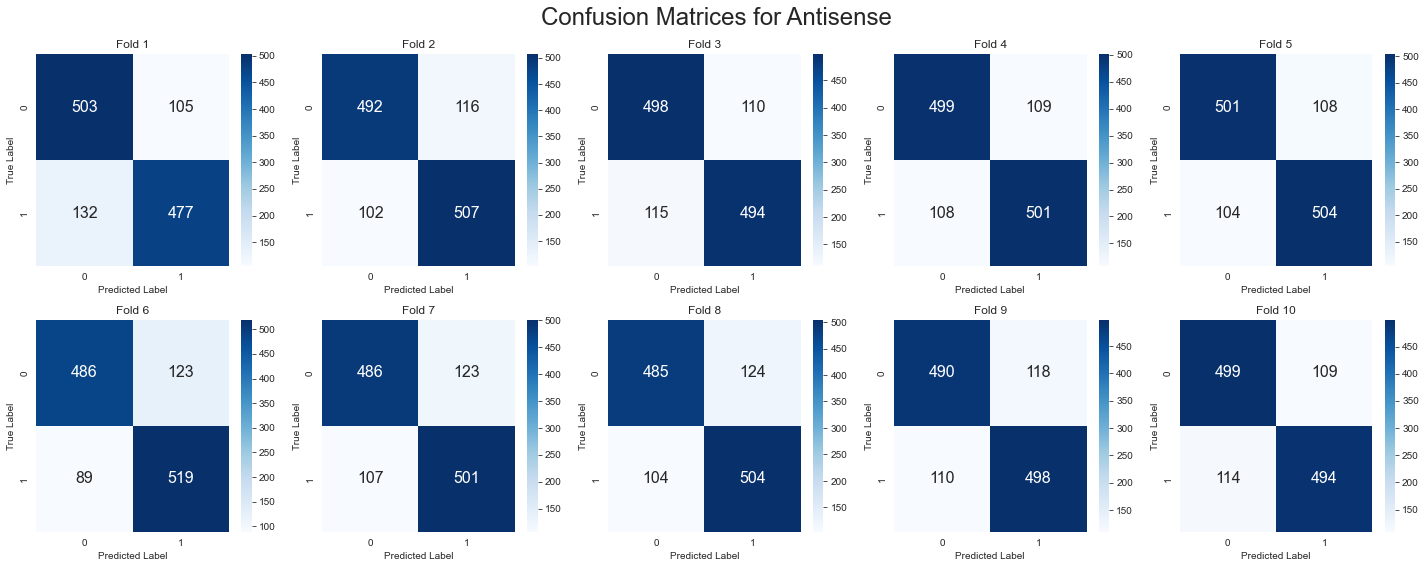

In [74]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Antisense", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(antisense_cms):
        cm = antisense_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()


## Internal Promoter with downstream

In [75]:
internal= pd.read_csv(r"D:\Other promoters\Downstream sequences\Induced\Induced promoter vs downstream\Induced ganji promoter vs downstream.csv")
internal

,-80,-79,-78,-77,-76,-75,-74,-73,-72,-71,...,10,11,12,13,14,15,16,17,18,label
0,-1.46,-2.18,-1.42,-2.81,-1.52,-2.81,-1.42,-1.76,-1.76,-2.18,...,-1.95,-1.46,-2.18,-1.95,-1.95,-1.95,-2.17,-2.18,-1.44,1
1,-2.17,-2.18,-1.44,-1.95,-1.95,-2.17,-1.95,-1.95,-1.52,-2.81,...,-1.44,-1.46,-2.99,-1.46,-1.95,-1.52,-2.17,-1.44,-2.99,1
2,-1.76,-1.76,-2.99,-1.76,-1.44,-2.17,-1.44,-2.99,-1.44,-1.46,...,-1.46,-2.99,-1.44,-1.95,-2.17,-1.95,-1.44,-2.99,-1.46,1
3,-2.81,-1.44,-1.95,-2.81,-1.46,-1.44,-2.18,-2.17,-1.95,-1.52,...,-1.95,-1.95,-2.81,-1.42,-2.18,-1.95,-1.95,-2.17,-2.18,1
4,-1.46,-2.18,-1.46,-1.95,-1.95,-1.52,-1.95,-1.95,-2.17,-2.18,...,-2.81,-1.44,-1.95,-1.46,-2.18,-1.95,-1.95,-1.95,-2.17,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12125,-1.76,-2.99,-1.76,-1.76,-1.44,-2.81,-1.42,-1.76,-2.99,-1.42,...,-1.44,-1.95,-2.81,-1.46,-2.18,-1.76,-1.76,-1.42,-1.76,0
12126,-1.76,-1.42,-2.18,-2.81,-1.42,-2.99,-1.44,-1.95,-1.46,-2.99,...,-1.76,-2.99,-1.42,-2.18,-1.95,-2.81,-1.76,-1.42,-2.99,0
12127,-1.95,-1.46,-2.18,-1.95,-1.46,-2.18,-2.81,-1.76,-1.42,-2.18,...,-1.44,-2.81,-1.42,-2.99,-1.76,-1.44,-2.81,-1.76,-1.44,0
12128,-2.99,-1.76,-1.42,-2.18,-1.95,-1.46,-2.18,-2.81,-1.76,-1.44,...,-2.99,-1.42,-1.76,-2.18,-2.17,-2.18,-1.42,-1.76,-2.99,0


In [76]:
internal_promoter= internal.drop(columns=['label'])
internal_label= internal['label']

In [77]:
# Convert DataFrame to numpy array
if isinstance(internal_promoter, pd.DataFrame):
    internal_promoter = internal_promoter.to_numpy()

# Split data into 10 equal parts
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

internal_accuracy = []
internal_precision=[]
internal_recall=[]
internal_f1_score=[]
internal_cms = []
internal_mcc = []
internal_specificity = []


# Perform predictions on each part
for i, (train_index, test_index) in enumerate(skf.split(internal_promoter, internal_label)):
    print(f"Fold {i+1}/{n_splits}")
    
    # Split data into train and test sets for this fold
    X_test = internal_promoter[test_index]
    y_test = internal_label[test_index]
    
    # Make predictions on the test set for this fold
    y_pred = clf.predict(X_test)
    
    # Calculate specificity
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)
    
    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    internal_accuracy.append(accuracy)
    internal_precision.append(precision)
    internal_recall.append(recall)
    internal_f1_score.append(f1)
    internal_mcc.append(mcc)
    internal_specificity.append(specificity)
    
    print(" Accuracy: {}, Precision: {}, Recall: {}, F1 Score: {}, MCC: {}, Specificity: {}".format(
    internal_accuracy[-1], internal_precision[-1], internal_recall[-1], internal_f1_score[-1],
    internal_mcc[-1], internal_specificity[-1]))
    #fold_no += 1

    # Calculate confusion matrix for this fold
    cm = confusion_matrix(y_test, y_pred)
    internal_cms.append(cm)


Fold 1/10
 Accuracy: 0.8219291014014839, Precision: 0.8376511226252159, Recall: 0.7990115321252059, F1 Score: 0.8178752107925802, MCC: 0.644558719533135, Specificity: 0.8207236842105263
Fold 2/10
 Accuracy: 0.8070898598516076, Precision: 0.8188034188034188, Recall: 0.7891268533772653, F1 Score: 0.8036912751677853, MCC: 0.6145954408495952, Specificity: 0.8448844884488449
Fold 3/10
 Accuracy: 0.8153338829348722, Precision: 0.8353765323992994, Recall: 0.785831960461285, F1 Score: 0.8098471986417657, MCC: 0.6317994549185043, Specificity: 0.8250825082508251
Fold 4/10
 Accuracy: 0.8087386644682605, Precision: 0.8227194492254734, Recall: 0.7874794069192751, F1 Score: 0.8047138047138047, MCC: 0.6180587260332794, Specificity: 0.8448844884488449
Fold 5/10
 Accuracy: 0.7938994229183842, Precision: 0.8030560271646859, Recall: 0.7792421746293245, F1 Score: 0.7909698996655519, MCC: 0.5880676841562549, Specificity: 0.83003300330033
Fold 6/10
 Accuracy: 0.8285243198680956, Precision: 0.839590443686006

In [78]:
internal_accuracy

[0.8219291014014839,
 0.8070898598516076,
 0.8153338829348722,
 0.8087386644682605,
 0.7938994229183842,
 0.8285243198680956,
 0.8301731244847486,
 0.8037922506183017,
 0.8161582852431987,
 0.843363561417972]

In [79]:
internal_precision

[0.8376511226252159,
 0.8188034188034188,
 0.8353765323992994,
 0.8227194492254734,
 0.8030560271646859,
 0.8395904436860068,
 0.8355704697986577,
 0.8205574912891986,
 0.8377425044091711,
 0.8674911660777385]

In [80]:
internal_recall

[0.7990115321252059,
 0.7891268533772653,
 0.785831960461285,
 0.7874794069192751,
 0.7792421746293245,
 0.8118811881188119,
 0.8217821782178217,
 0.7772277227722773,
 0.7838283828382838,
 0.8102310231023102]

In [81]:
internal_specificity

[0.8207236842105263,
 0.8448844884488449,
 0.8250825082508251,
 0.8448844884488449,
 0.83003300330033,
 0.8085808580858086,
 0.8451400329489291,
 0.8385502471169687,
 0.8303130148270181,
 0.8484349258649094]

In [82]:
internal_f1_score

[0.8178752107925802,
 0.8036912751677853,
 0.8098471986417657,
 0.8047138047138047,
 0.7909698996655519,
 0.825503355704698,
 0.8286189683860232,
 0.7983050847457627,
 0.8098891730605285,
 0.8378839590443685]

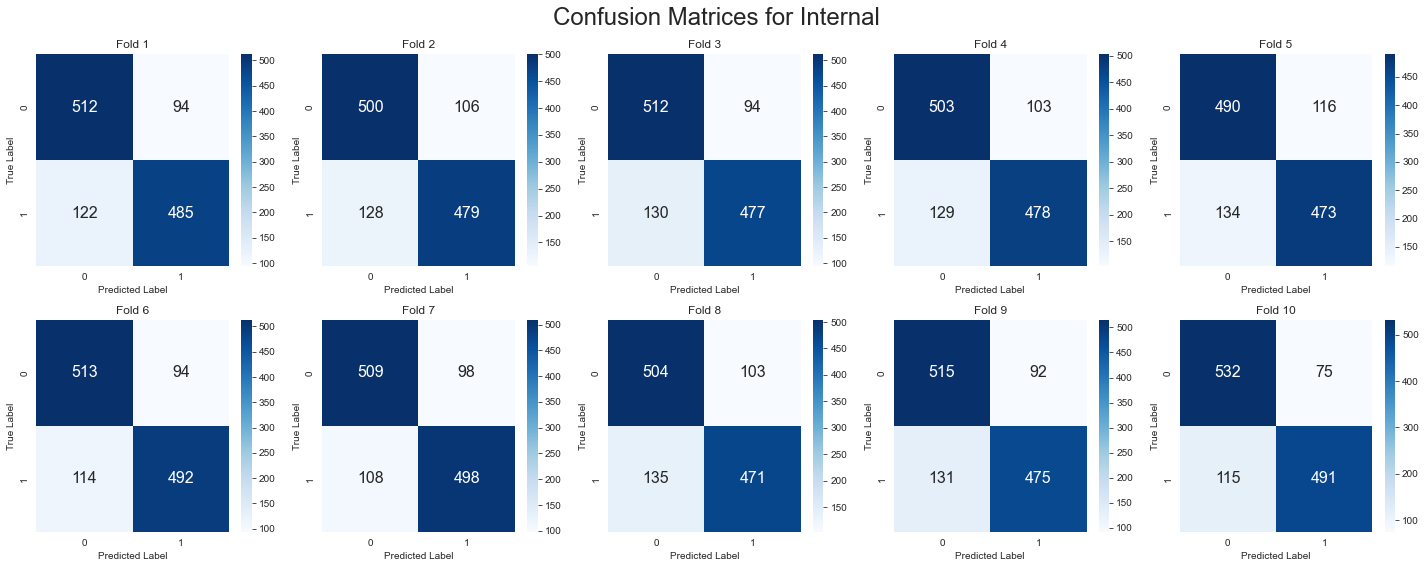

In [83]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
fig.suptitle("Confusion Matrices for Internal", fontsize=24)

for i, ax in enumerate(axs.flatten()):
    if i < len(internal_cms):
        cm = internal_cms[i]
        sns.heatmap(cm, annot=True, annot_kws={"size": 16}, cmap='Blues', fmt='g', ax=ax)
        ax.set_title(f"Fold {i+1}")
        ax.set_xlabel('Predicted Label')
        ax.set_ylabel('True Label')
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()
